## Part One: Data Exploration

In [249]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

df_insurance = pd.read_csv('./Data/insurance_costs.csv')
df_insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [251]:
df_insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [252]:
df_insurance.isna().any()

age        False
sex        False
bmi        False
smoker     False
region     False
charges    False
dtype: bool

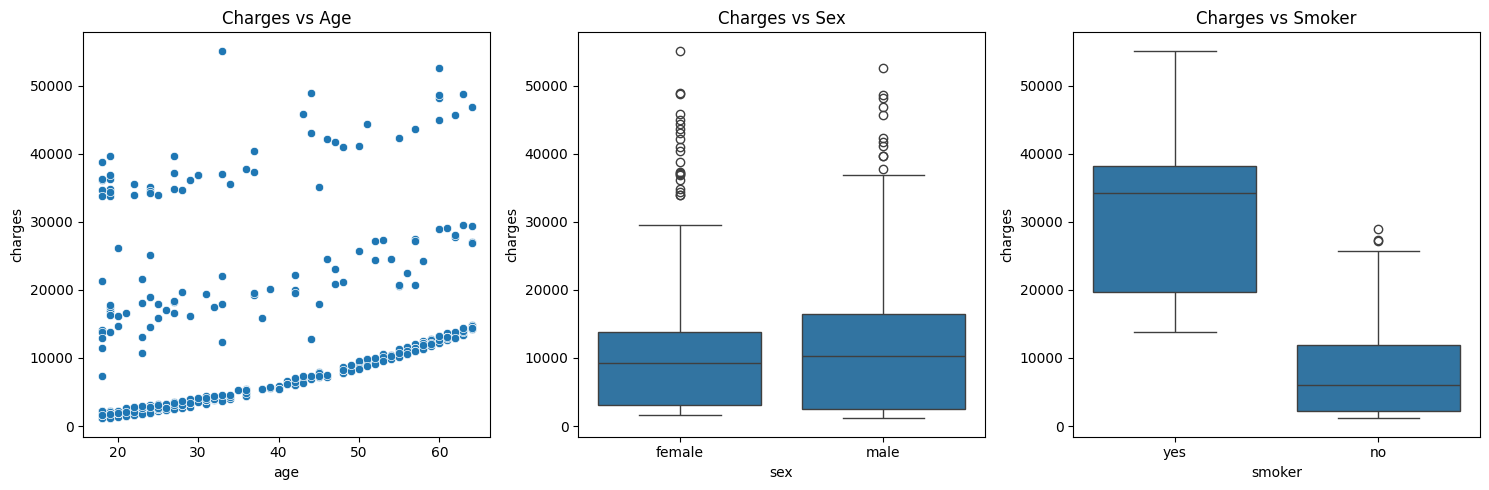

In [253]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Age
sns.scatterplot(x='age', y='charges', data=df_insurance, ax=axs[0])
axs[0].set_title("Charges vs Age")

# Sex
sns.boxplot(x='sex', y='charges', data=df_insurance, ax=axs[1])
axs[1].set_title("Charges vs Sex")

# Smoker
sns.boxplot(x='smoker', y='charges', data=df_insurance, ax=axs[2])
axs[2].set_title("Charges vs Smoker")

plt.tight_layout()
plt.show()

Age: Seems to be 3 distinct curved lines sloped upwards, increasing as age increases\
Sex: Male and female minimum and IQR are around the same, but male has a higher maximum and both plots have outliers, with women having more outliers\
Smoker: Smokers have much higher costs than non-smokers

## Part Two: Simple Linear Models

In [254]:
X = df_insurance[['age']]
y = df_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('lr', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = pipeline['lr'].coef_
intercept = pipeline['lr'].intercept_

print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

MSE: 141029548.95804176
R-squared: 0.1287424190241595
Coefficient: [214.5460771]
Intercept: 4031.0413606972625


MSE: Huge, indicates that using only age cannot accurately predict charges\
R-squared: Only about 13% of variance is explained with model\
Coefficiants: Age 0 would yield ~4031 in charges, and with each year of age, charges increases by ~215

In [255]:
X = df_insurance[['sex']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_enc = Pipeline([
    ('enc', OneHotEncoder()),
    ('lr', LinearRegression())
])

pipeline_enc.fit(X_train, y_train)
y_pred = pipeline_enc.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 165546149.4746172
R-squared: -0.02271714542624914


In [256]:
X = df_insurance[['smoker']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_enc.fit(X_train, y_train)
y_pred = pipeline_enc.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 47828570.576878846
R-squared: 0.7045228818342075


Smoker model: much lower MSE and much higher R-squared

## Part Three: Multiple Linear Models

In [257]:
X = df_insurance[['age', 'bmi']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 134239917.63105714
R-squared: 0.1706876553903791


Slightly lower MSE and slightly higher R-squared from Part 2 Q1

In [258]:
X = df_insurance[['age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_square = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

pipeline_square.fit(X_train, y_train)
y_pred = pipeline_square.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 140964723.05883405
R-squared: 0.12914290286988972


About same as Part 2 Q1

In [259]:
pipeline_quad = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('linear', LinearRegression())
])

pipeline_quad.fit(X_train, y_train)
y_pred = pipeline_quad.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 138845451.4874985
R-squared: 0.14223541742669377


Slightly lower MSE and slightly higher R-squared from Part 2 Q1

In [260]:
pipeline_12 = Pipeline([
    ('poly', PolynomialFeatures(degree=12, include_bias=False)),
    ('linear', LinearRegression())
])

pipeline_12.fit(X_train, y_train)
y_pred = pipeline_12.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 141790545.42545867
R-squared: 0.12404110680816371


About same as Part 2 Q1

Part 2 Q3: much lower MSE and much higher R-squared than every other model, each performing smilarly

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


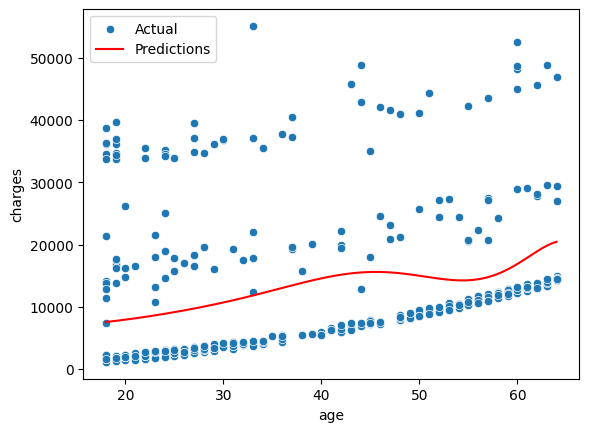

In [261]:
pipeline_12.fit(X, y)

age_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

y_range_pred = pipeline_12.predict(age_range)
prediction_df = pd.DataFrame({'Age': age_range.flatten(), 
                              'Predicted': y_range_pred})

sns.scatterplot(x='age', y='charges', data=df_insurance, label='Actual')
sns.lineplot(x='Age', y='Predicted', data=prediction_df, color='red', label='Predictions')

plt.show()

## Part Four: New data

In [262]:
df_insurance_2 = pd.read_csv('./Data/insurance_costs_2.csv')
df_insurance_2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [263]:
X_train = df_insurance[['age', 'bmi', 'smoker']]
X_test = df_insurance_2[['age', 'bmi', 'smoker']]

X_train_age = X_train[['age']]
X_test_age = X_test[['age']]

X_train_age_bmi = X_train[['age', 'bmi']]
X_test_age_bmi = X_test[['age', 'bmi']]

y_train = df_insurance['charges']
y_test = df_insurance_2['charges']

cat = ['smoker']
num = ['age', 'bmi']

pipelines = {
    "age": Pipeline([
        ('lr', LinearRegression())
    ]),
    "age_bmi": Pipeline([
        ('lr', LinearRegression())
    ]),
    "age_bmi_smoker": Pipeline([
        ('ct', ColumnTransformer([
            ('enc', OneHotEncoder(), cat)
        ], remainder='passthrough')),
        ('lr', LinearRegression())
    ]),
    "age_bmi:smoker": Pipeline([
        ('ct', ColumnTransformer([
            ('enc', OneHotEncoder(), cat),
            ('interaction', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), num)
        ], remainder='passthrough')),
        ('lr', LinearRegression())
    ]),
    "(age + bmi)*smoker": Pipeline([
        ('ct', ColumnTransformer([
            ('enc', OneHotEncoder(), cat),
            ('interaction', PolynomialFeatures(degree=2, include_bias=False), num)
        ], remainder='passthrough')),
        ('lr', LinearRegression())
    ])
}

mses = {}
for model, pipeline in pipelines.items():
    if model == "age":
        pipeline.fit(X_train_age, y_train)
        y_pred = pipeline.predict(X_test_age)
    elif model == "age_bmi":
        pipeline.fit(X_train_age_bmi, y_train)
        y_pred = pipeline.predict(X_test_age_bmi)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mses[model] = mse

    print(f"MSE for {model}: {mse:.2f}")

best_model = min(mses, key=mses.get)
print(f"Best model: {best_model}")


MSE for age: 136077136.50
MSE for age_bmi: 132636406.11
MSE for age_bmi_smoker: 35377541.24
MSE for age_bmi:smoker: 35514622.83
MSE for (age + bmi)*smoker: 35502778.93
Best model: age_bmi_smoker


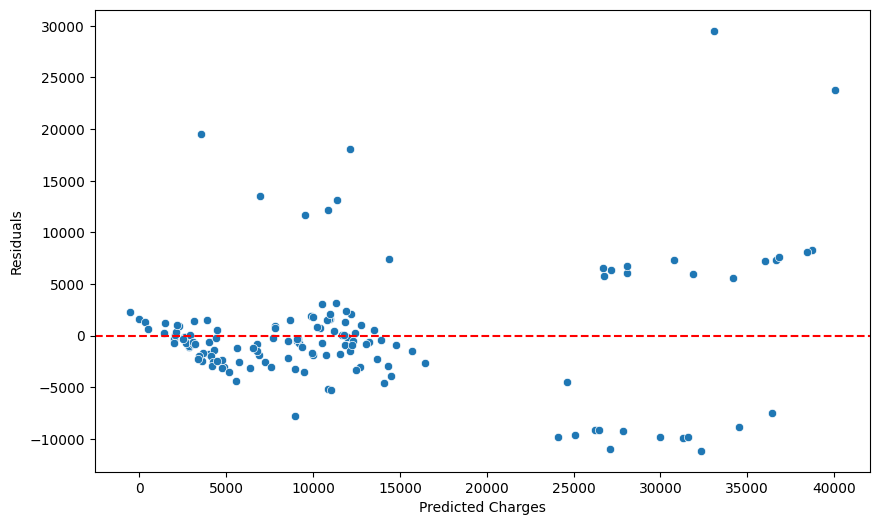

In [264]:
best_pipeline = pipelines[best_model]
best_pipeline.fit(X_train, y_train)

y_pred = best_pipeline.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)

plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

## Part Five: Full Exploration

In [265]:
X_train_all = df_insurance.drop('charges', axis=1)
X_test_all = df_insurance_2.drop('charges', axis=1)

num = ['age', 'bmi']
cat = ['smoker', 'sex', 'region']

ct = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(), cat)
])

pipeline = Pipeline([
    ('ct', ct),
    ('lr', LinearRegression())
])

pipeline.fit(X_train_all, y_train)
y_pred = pipeline.predict(X_test_all)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE for all_scaled: {mse:.2f}")
mses["all_scaled"] = mse

MSE for all_scaled: 36021379.54


In [266]:
ct = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(), cat),
])

pipeline = Pipeline([
    ('ct', ct),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

pipeline = Pipeline([
    ('intermediate', pipeline),
    ('lr', LinearRegression())
])

pipeline.fit(X_train_all, y_train)
y_pred = pipeline.predict(X_test_all)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE for all_interactions: {mse:.2f}")
mses["all_interactions"] = mse

MSE for all_interactions: 24565034.60


In [267]:
X_train_no_sex = X_train_all.drop('sex', axis=1)
X_test_no_sex = X_test_all.drop('sex', axis=1)

cat = ['smoker', 'region']

ct = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(), cat),
])

pipeline = Pipeline([
    ('ct', ct),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

pipeline = Pipeline([
    ('intermediate', pipeline),
    ('lr', LinearRegression())
])

pipeline.fit(X_train_no_sex, y_train)
y_pred = pipeline.predict(X_test_no_sex)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE for all_interactions_no_sex: {mse:.2f}")
mses["all_interactions_no_sex"] = mse

MSE for all_interactions_no_sex: 24411755.06


In [268]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([
    ('ct', ct),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

pipeline = Pipeline([
    ('intermediate', pipeline),
    ('lasso', Lasso(alpha=1.0))
])

pipeline.fit(X_train_no_sex, y_train)
y_pred = pipeline.predict(X_test_no_sex)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE for all_interactions_no_sex_lasso: {mse:.2f}")
mses["all_interactions_no_sex_lasso"] = mse

MSE for all_interactions_no_sex_lasso: 23742419.24


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+07, tolerance: 6.065e+06
  model = cd_fast.enet_coordinate_descent(


In [269]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('ct', ct),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

pipeline = Pipeline([
    ('intermediate', pipeline),
    ('lasso', Ridge(alpha=1.0))
])

pipeline.fit(X_train_no_sex, y_train)
y_pred = pipeline.predict(X_test_no_sex)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE for all_interactions_no_sex_ridge: {mse:.2f}")
mses["all_interactions_no_sex_ridge"] = mse

MSE for all_interactions_no_sex_ridge: 23690869.77


In [270]:
best_model = min(mses, key=mses.get)
print(f"Best model: {best_model}")

Best model: all_interactions_no_sex_ridge


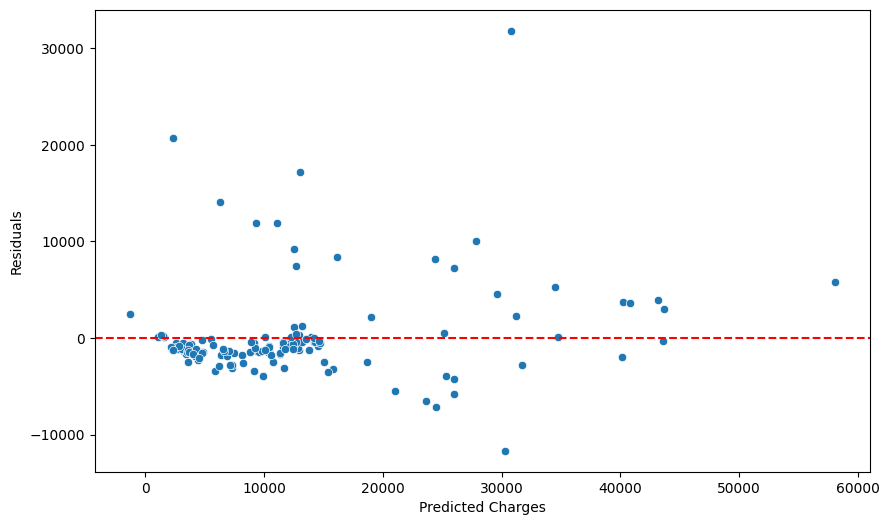

In [271]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)

plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')

Best model I could find was using Ridge regression with an alpha of 1.0 with all explanatory variables besides sex and their interactions.